# Udacity Data Analyst Nanodegree: Investigate a dataset
## Kareem Wahid
### Last updated: August 18, 2017

# Import dependencies

In [1]:
# Import all dependencies
import numpy as np, pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
sns.set(style="white")
%matplotlib inline

# Table of contents
1. [Introduction](#intro)
2. [Data wrangling](#data)
    1. [Raw dataset](#raw)
    2. [Pre-processing](#pre)
3. [Data exploration](#explore)
    1. [Basic statistics](#stats)
    2. [Correlations](#corr)
    3. [Investigating survival](#survival)
        1. [Pairplot](#pair)
        2. [Relationship between class, sex, and survival](#class)
        3. [Relationship between fare, class, and survival](#fare)
        4. [Relationship between age, sex, and survival](#age)
        5. [Best chance of survival](#chance)
4. [Conclusions](#conclusions)

# 1. Introduction <a name="intro"></a>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class. Description reproduced from: https://www.kaggle.com/c/titanic.

In [2]:
Image(url= 
      "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/St%C3%B6wer_Titanic.jpg/350px-St%C3%B6wer_Titanic.jpg", 
      width=500, height=500) # link to picture of titanic sinking

In this study, we seek to answer the following questions:


**1. What basic statistical information about the variables can we derive from the Titanic dataset? **

**2. What varaibles are correlated in the Titanic dataset?**

**3. What variables are related to survival, and what visualization tools can we use to observe these relationships?** 

**4. Which subgroup of passengers was most likely to survive the sinking of the Titanic? **


# 2. Data wrangling <a name="data"></a>

## 2.A Raw dataset <a name="raw"></a>

The titanic dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The raw dataset is shown below in a Pandas dataframe object. 

In [3]:
# Load dataset 
dataset = pd.read_csv('titanic-data.csv') # dataset obtained from Kaggle 
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


As we can see, there are 891 rows corresponding to passengers each with 12 defining variables. More information on the dataset can be found at https://www.kaggle.com/c/titanic/data. The 12 variables are reproduced below with their descriptors. 
 
|Variable|Definition|
|:-|:-|
|Survival|Survival (0 = No, 1 = Yes)|
|Pclass|Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)|
|Sex|Sex (male, female)|
|Sibsp|# of siblings / spouses aboard the Titanic|
|Parch|# of parents / children aboard the Titanic|
|Ticket|Ticket number|
|Fare|Passenger fare|
|Cabin|Cabin number|
|Embarked|Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)|



## 2.B Pre-processing <a name="pre"></a>

For the purpose of this investigation, we will remove features from the dataset that are not easily numerically interpretable, such as strings. In addition, we pre-process the dataset by removing rows with NaN values in them (these are found in the Age column). This reduces the number of passengers in our dataset to 714. Finally, we add dummy variables to non-numeric data in order to investigate correlations between all variables later.

In [4]:
dataset = dataset.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1) # Remove columns
dataset = dataset[np.isfinite(dataset['Age'])] # Remove all NaN values 

dataset_dummies = pd.get_dummies(dataset['Embarked']) # Create dummy variables for embarked ports
dataset_new = pd.concat([dataset, dataset_dummies], axis=1) 

dataset_dummies = pd.get_dummies(dataset['Sex']) # Create dummy variables for each sex 
dataset_new = pd.concat([dataset_new, dataset_dummies], axis=1)
del dataset_new['male'] # Only keep female variable 

dataset_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0


# 3. Data exploration <a name="explore"></a>

## 3.A Basic statistics <a name="stats"></a>
Here we calculate basic statistical information for numerical data.

In [5]:
dataset_new.drop(['C','Q','S','female'], axis=1).describe() # drop dummy variables 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


On average passengers would not survive with a mean of 0.41. This is illustrated furthur below via barchart.

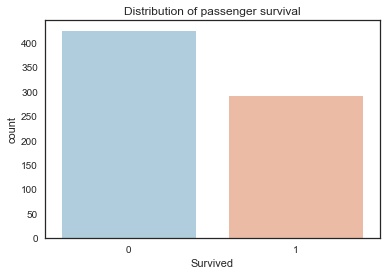

In [6]:
g = sns.countplot(x='Survived', data=dataset_new, palette='RdBu_r')
g.set_title('Distribution of passenger survival')

The average age of a passenger was 30. This is reasonable given that most travelers wouldn't be too young or too old. We visualize the distribution of ages below.  

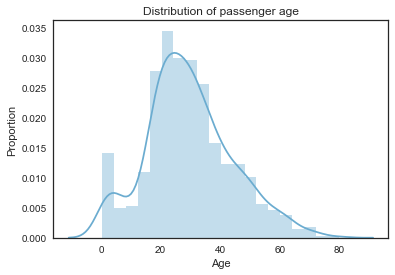

In [7]:
g = sns.distplot(dataset['Age'], color='#6BACD0')
g.set_ylabel('Proportion')
g.set_title('Distribution of passenger age')

The top 50 percentile for both SibSp and Parch was 0, so it seems most passengers were traveling alone. We observe the distribution of number of siblings/spouses and parents/children below.

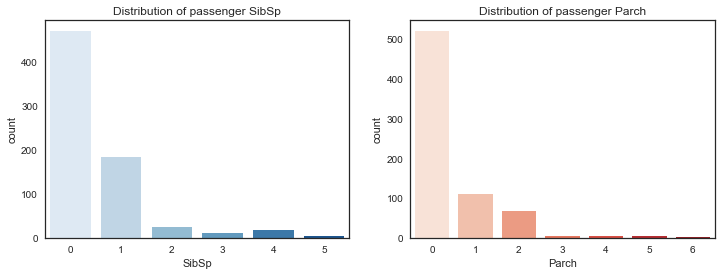

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

g = sns.countplot(x='SibSp', data=dataset_new, palette='Blues', ax=axs[0])
h = sns.countplot(x='Parch', data=dataset_new, palette='Reds', ax=axs[1])

g.set_title('Distribution of passenger SibSp')
h.set_title('Distribution of passenger Parch')

Regarding Fare, the average price of a ticket was 35 while the maximum price was 512, possibly for a luxury suite. It is interesting to note that the minimum price was 0, potentially indicating some stowaways were onboard, or certain passengers were able to ride for free (i.e. crew). We visualize the distribution of ticket prices below.

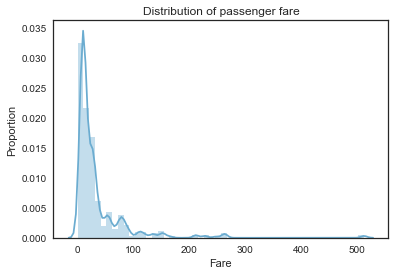

In [9]:
g = sns.distplot(dataset['Fare'], color='#6BACD0')
g.set_ylabel('Proportion')
g.set_title('Distribution of passenger fare')

## 3.B Correlations <a name="corr"></a>
We can investigate correlations between variables in our dataset through the use of a heatmap. Here we utilize spearman correlations between each variable pair. We chose spearman correlations over the classical pearson correlation since many of our variables were categorical.


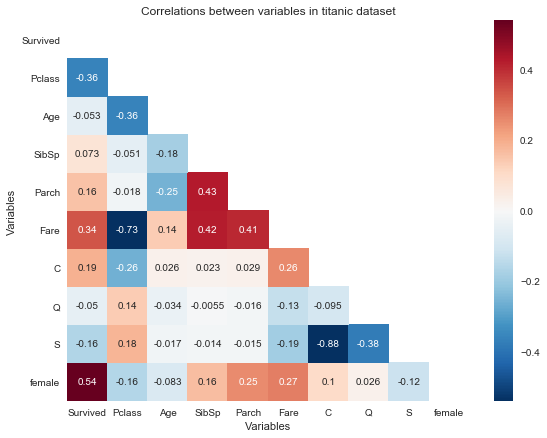

In [10]:
corr = dataset_new.drop(['Sex', 'Embarked'], axis = 1).corr(method='spearman') # Remove sex and embarked since not numerical 

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(corr, vmin = -0.5, vmax = 0.54, mask=mask, annot=True)
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')
ax.set_title('Correlations between variables in titanic dataset')

# visualization inspired from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

Clearly we can observe strong correlations between certain variables. Red areas represent positive correlations, while blue areas represent negative correlations. The "dark" areas in the heatmap represent strongly correlated variables while the "light" areas represent weakly correlated variables. Though variable effect on survival will be our biggest focus in this study, it is still interesting to note the correlations between the other variables. We list the top 10 correlations (by absolute value) below. 

In [11]:
# Get top correlations 

corr_matrix = corr.abs()
top_correlations = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack().reset_index() # reset index so you can get all pairs
                 .sort_values(by=0, ascending=False)) # need to do this so all pairs show up 

top_correlations = pd.DataFrame(top_correlations)
top_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation score']

print "Top 10 correlations:"
top_correlations[:10] # Display first 10 top correlations

# Inspired from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

Top 10 correlations:


,Variable 1,Variable 2,Correlation score
40,C,S,0.877931
12,Pclass,Fare,0.730578
8,Survived,female,0.538826
24,SibSp,Parch,0.426955
25,SibSp,Fare,0.422994
30,Parch,Fare,0.407150
42,Q,S,0.375934
9,Pclass,Age,0.361666
0,Survived,Pclass,0.360656
4,Survived,Fare,0.339027


Of course, intuition would lead us to believe many of these variables are strongly related. For example, our created departure variables (C,S,Q) are strongly correlated to each other since departure at one of these ports would mean you did not depart at the others. Passenger class and fare were strongly positively correlated since higher class individuals probably spent more on their ticket. Being female is strongly correlated to survival, which will be investigated further below. Naturally, SibSp and Parch were strongly positively correlated since passengers traveling with large families would have high values for both these variables. Similarly, SibSP and Parch were both strongly correlated with Fare; it is possible larger families paid more for their tickets. Interestingly, and probably not instinctively intuitive, class and age are strongly negatively correlated. Finally, survival and class are strongly negatively correlated (with the opposite trend appearing for survival and fare), which will also be investigated further. 

## 3.C Investigating survival <a name="survival"></a>
Here we investigate the effects certain variables had on survival outcome. 

### 3.C.a Pairplot <a name="pair"></a>
Below we visualize pairwise relationships in the data with respect to survival outcome. 

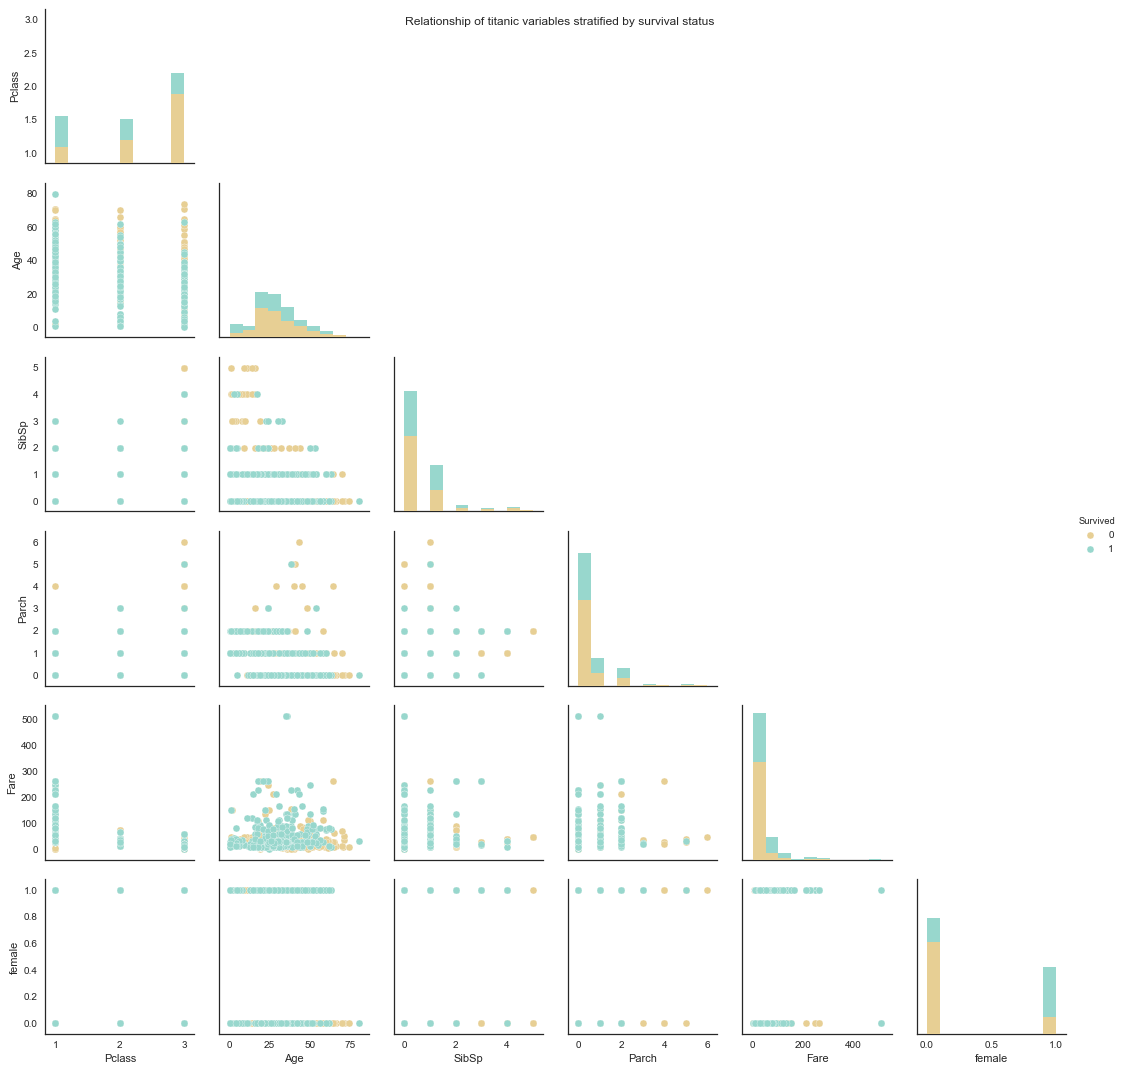

In [12]:
g = sns.pairplot(dataset_new, hue="Survived", vars= ["Pclass", "Age", "SibSp", "Parch", 'Fare', 'female'], palette='BrBG') 

sns.plt.suptitle('Relationship of titanic variables stratified by survival status')

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

The resulting pairplot demonstrates some interesting trends between survival and certain variables. Upon visual inspection, clearly class has something to do with survival, as proportionally more people survive in higher classes. Additionally, clearly more females survive than males. This is consistent with our correlation analysis. We observe these and other relationships in this plots below.

### 3.C.b Relationship between class, sex, and survival <a name="class"></a>

As seen above, clearly class has something to do with a passengers chance of surviving the titanic disaster. We investigate this further by utilizing a factor plot to see if a passengers class increases or decreases the probability of surviving, and providing further stratification of the data by looking at male and female datapoint separately. 

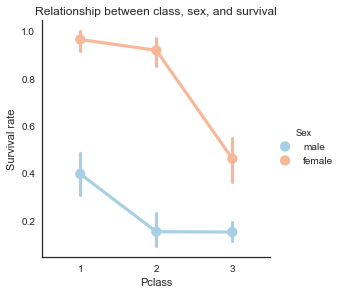

In [13]:
g = sns.factorplot("Pclass", "Survived", data=dataset, hue="Sex", palette='RdBu_r')
g.ax.set_title('Relationship between class, sex, and survival')
g.set_ylabels('Survival rate')

As expected we do see a visible trend between survival and class for both sexes. Specifically, females in first and second class have a fairly good chance of surviving, with the chance of survival dropping significantly for females in third class. A similar trend is observed for males, however, the drop in survival from 2nd to 3rd class is virtually nonexistent. What this probably means is that males only really had a better chance of surviving if they were in first class, and most likely a richer member of society. 

### 3.C.c Relationship between fare, class, and survival <a name="fare"></a>

The pair plot demonstrates a possible relationship between class and fare. Therefore, we attempt to visualize this relationship via a violinplot below.  In addition, we stratify the data on survival outcome to determine if there are any noticeable differences in the fares survivors paid. 

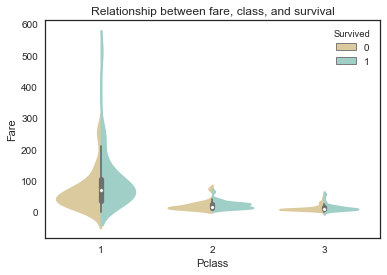

In [14]:
g = sns.violinplot(x="Pclass", y="Fare", hue="Survived", data=dataset, split=True, palette='BrBG');
g.set_title('Relationship between fare, class, and survival')

The violinplot above demonstrates how passengers who were in first class on average paid more for their tickets. Interestingly, first class passengers have wider variability in their data as well. Additionally, survivors in first class tended to spend slightly more for their tickets. Again, we observe that passengers in higher classes had a better chance of survival, and this directly correlated with the price they paid for their ticket. 

### 3.C.d Relationship between age, sex, and survival <a name="age"></a>

Another variable we can observe is age and its relation to survival. Though it is not clear if the distribution produced in the pairplot  shows any obvious relationship between age and survival, plotting the data in a different format might be beneficial. Below we demonstrate the use of a regressionplot and implement logistic regression (since our y output is binary) and bin the ages into 10 bins. We also investigate if there is any difference between the sex's for this data. 

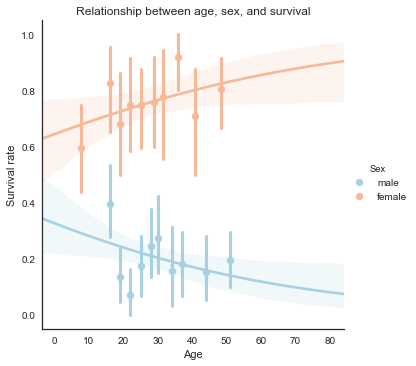

In [15]:
g = sns.lmplot(x='Age', y='Survived', x_bins=10, logistic=True, data=dataset_new, hue='Sex', palette='RdBu_r')
g.ax.set_title('Relationship between age, sex, and survival')
g.set_ylabels('Survival rate')

Though our correlation analysis would lead us to believe otherwise, there actually does seem to be a relationship between age and survival! Specifically, for males, younger individuals were more likely to survive, while for females, older individuals were more likely to survive. This is an interesting result that we would have not observed if we did not investigate the dataset further.

### 3.C.e Best chance of survival <a name="chance"></a>
We now know that a passengers class, age, and sex had a role in whether a passenger would survive the sinking of the titanic. Therefore, we define a new variable called "Social" that classifies a passenger as a rich/poor man, woman, boy, or girl. Passengers are stratified into rich/poor categories depending on what class their ticket was (1st or 2nd = rich, 3rd = poor), and man, woman, boy, or girl depending on their sex (M, F) and age (< or >= 18).

In [16]:
# define social status 

dataset_ss = dataset_new.copy()
dataset_ss['Social'] = dataset_ss['Sex']

dataset_ss.loc[(dataset_ss['Sex'] == 'female') & (dataset_ss['Pclass'] != 3) & (dataset_ss['Age'] >= 18), 'Social'] = 'Rich woman'
dataset_ss.loc[(dataset_ss['Sex'] == 'female') & (dataset_ss['Pclass'] == 3) & (dataset_ss['Age'] >= 18), 'Social'] = 'Poor woman'
dataset_ss.loc[(dataset_ss['Sex'] == 'male') & (dataset_ss['Pclass'] != 3) & (dataset_ss['Age'] >= 18), 'Social'] = 'Rich man'
dataset_ss.loc[(dataset_ss['Sex'] == 'male') & (dataset_ss['Pclass'] == 3) & (dataset_ss['Age'] >= 18), 'Social'] = 'Poor man'
dataset_ss.loc[(dataset_ss['Sex'] == 'female') & (dataset_ss['Pclass'] != 3) & (dataset_ss['Age'] < 18), 'Social'] = 'Rich girl'
dataset_ss.loc[(dataset_ss['Sex'] == 'female') & (dataset_ss['Pclass'] == 3) & (dataset_ss['Age'] < 18), 'Social'] = 'Poor girl'
dataset_ss.loc[(dataset_ss['Sex'] == 'male') & (dataset_ss['Pclass'] != 3) & (dataset_ss['Age'] < 18), 'Social'] = 'Rich boy'
dataset_ss.loc[(dataset_ss['Sex'] == 'male') & (dataset_ss['Pclass'] == 3) & (dataset_ss['Age'] < 18), 'Social'] = 'Poor boy'

dataset_ss.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,Social
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,Poor man
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,Rich woman
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,Poor woman
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,Rich woman
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,Poor man


Below we plot a barchart of the mean survival outcome for each "Social" class in acsending order. 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

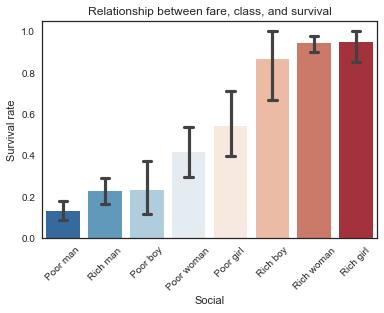

In [17]:
order = ['Poor man', 'Rich man', 'Poor boy', 'Poor woman', 'Poor girl', 'Rich boy','Rich woman', 'Rich girl']

a = sns.barplot(x="Social", y="Survived", order=order, data=dataset_ss, capsize=.2, palette='RdBu_r')
a.set_title('Relationship between fare, class, and survival')
a.set_ylabel('Survival rate')
plt.xticks(rotation=45)

We clearly observe that the survivors of the titanic had the best chance of surviving in the following order: poor man, rich man, poor boy, poor woman, poor girl, rich boy, rich woman, rich girl. This makes sense since there were only a limited number of lifeboats, and as the saying goes "woman and children first". I do find it interesting though that a poor woman generally had a better chance of surviving the titanic than a poor boy. Additionally, though our analysis of age earlier indicates older woman are more likely to survive, this includes all classes and does not consider classes separately. These results are also probably observed due to the way we chose to stratify data (defining rich as 1st or 2nd class and child as < 18). 

# 4. Conclusions <a name="conclusions"></a>

Through the use of various visualization tools and statistical analysis, we are able to probe the Titanic dataset for useful insights. Among these insights are the following:
1. Basic statistics can give us useful information to explore about distributions within the titanic dataset.
2. Many variables are strongly correlated with each other, with some surprising answers.
3. Class, age, and sex are related to survival in ways we can directly visualize with charts and graphs.
4. By defining our own subset of passengers, we can determine who was most likely to survive the sinking of the titanic. Specifically, we find that poor men are the least likely to survive, while rich girls are the most likely to survive, as intuition would lead us to believe.

Several limitations exist within our dataset that could have introduced bias into the analysis. To begin with, we are using a subset of the full number of passengers, i.e. 891 out of the 2224 passengers. We assume these passengers are a good representation of all the passengers in the Titanic, but this might not necessarily be the case. Additionally, we have chosen to remove any passengers with missing data, further dropping our sample size and possibly introducing bias into the analysis. In any future analysis, it might be advisable to utilize imputation to retain datapoints in our dataset instead of “throwing away” data points. 

Though we have not executed an exhaustive search of all the relationships between variables in the Titanic dataset, we believe this is a good start that provides interesting information about the Titanic disaster from the data.